In [1]:
import scipy.io
import numpy as np
import CMR_IA as cmr
import matplotlib.pyplot as plt
import pickle
from statistics import mean, stdev
import pprint
import import_ipynb
import time
import pandas as pd
import seaborn as sns

np.set_printoptions(edgeitems=20, linewidth=150,precision=4)

In [2]:
# get wordfreq quantile
with open('../Data/simu4_word_freq.pkl', 'rb') as inp:
    df = pickle.load(inp)

In [3]:
with open("../Data/simu4_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)

In [4]:
s_mat = np.load('../Data/simu4_smat.npy')

In [5]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.4,
    beta_rec = 0.1,
    beta_rec_post = 0.2,
    gamma_fc = 0.1,
    s_fc = 0,
    c_thresh = 0.18,
    a = 2800,
    b = 2.14,
    m = 0,
    n = 0,
)
params

{'beta_enc': 0.4,
 'beta_rec': 0.1,
 'beta_rec_post': 0.2,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 8,
 'alpha': 4,
 'c_thresh': 0.18,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 2.14,
 'm': 0,
 'n': 0,
 'p': 0,
 't': 0,
 'gamma_fc': 0.1,
 'gamma_cf': 0.5}

### 100 Sessions

In [6]:
df_study = df_study.loc[df_study.session < 1]
# df_study

df_test = df_test.loc[df_test.session < 1]
# df_test

In [115]:
# pd.set_option('display.max_rows', 10)

In [16]:
# 100 sessions loop
# beta_choice = np.arange(0.01,1,0.01)
beta_choice = np.arange(0,20,0.5)
s_new = []
s_old = []
for b in beta_choice:
    # params.update(beta_enc=b)
    # params.update(gamma_fc=b)
    params.update(n=b)
    df_simu = cmr.run_norm_recog_multi_sess(params,df_study,df_test,s_mat)
    df_simu = df_simu.merge(df_test,on=['session','itemno'])
    new, old = df_simu.groupby("old").csim.mean().to_numpy()
    s_new.append(new)
    s_old.append(old)
df_exp = pd.DataFrame({'beta_choice':beta_choice, 's_new':np.array(s_new), 's_old':np.array(s_old)})
df_exp

CMR Time: 0.08629751205444336
CMR Time: 0.05991649627685547
CMR Time: 0.05030679702758789
CMR Time: 0.05258607864379883
CMR Time: 0.05042576789855957
CMR Time: 0.05001020431518555
CMR Time: 0.049721479415893555
CMR Time: 0.049510955810546875
CMR Time: 0.05097603797912598
CMR Time: 0.04977273941040039
CMR Time: 0.04975295066833496
CMR Time: 0.049437522888183594
CMR Time: 0.05135798454284668
CMR Time: 0.049585819244384766
CMR Time: 0.049608707427978516
CMR Time: 0.04960036277770996
CMR Time: 0.0504302978515625
CMR Time: 0.049622297286987305
CMR Time: 0.0494081974029541
CMR Time: 0.04948282241821289
CMR Time: 0.05013585090637207
CMR Time: 0.05054950714111328
CMR Time: 0.049501895904541016
CMR Time: 0.04922890663146973
CMR Time: 0.050524234771728516
CMR Time: 0.04942941665649414
CMR Time: 0.049275875091552734
CMR Time: 0.04964089393615723
CMR Time: 0.05022478103637695
CMR Time: 0.04920673370361328
CMR Time: 0.049922943115234375
CMR Time: 0.05021786689758301
CMR Time: 0.050405025482177734
C

,beta_choice,s_new,s_old
0,0.0,0.0,0.005482
1,0.5,0.0,0.009973
2,1.0,0.0,0.014329
3,1.5,0.0,0.018484
4,2.0,0.0,0.022385
5,2.5,0.0,0.025991
6,3.0,0.0,0.029275
7,3.5,0.0,0.032225
8,4.0,0.0,0.034837
9,4.5,0.0,0.037119


In [17]:
# fig, ax = plt.subplots()
# sns.lineplot(data=df_exp, x='beta_choice',y='s_old',ax=ax,label='old')
# sns.lineplot(data=df_exp, x='beta_choice',y='s_new',ax=ax,label='new')
# plt.xlabel("beta_enc")
# plt.ylabel("mean context similarity")
# plt.legend()
# plt.savefig('fig/simu4_beta.pdf')

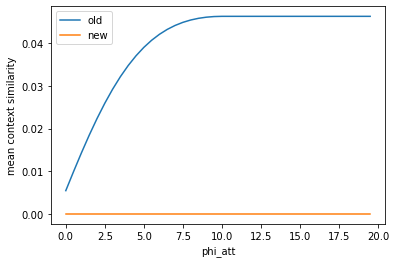

In [19]:
fig, ax = plt.subplots()
sns.lineplot(data=df_exp, x='beta_choice',y='s_old',ax=ax,label='old')
sns.lineplot(data=df_exp, x='beta_choice',y='s_new',ax=ax,label='new')
plt.xlabel("phi_att")
plt.ylabel("mean context similarity")
plt.legend()
plt.savefig('fig/simu4_att.pdf')

### 10 Trails

In [118]:
df_study = df_study.loc[df_study.session < 1]
df_study

,itemno,item,itemno_old,freq,quantile,session
0,316,FARM,552,1161,8,0
1,477,LEOPARD,812,118,3,0
2,433,INSTRUCTOR,741,78,2,0
3,87,BOTTLE,153,1479,8,0
4,84,BOOT,150,149,3,0
...,...,...,...,...,...,...
95,249,CUSTARD,429,54,1,0
96,85,BOOTH,151,154,3,0
97,71,BIRD,129,752,7,0
98,774,SHOE,1288,249,5,0


In [119]:
df_test = df_test.loc[df_test.session < 1]
df_test

,itemno,item,itemno_old,freq,quantile,session,old
0,341,FORT,595,411,6,0,True
1,512,MANSION,864,156,3,0,True
2,66,BENCH,121,345,6,0,True
3,386,GUARD,667,658,7,0,False
4,57,BEE,112,185,4,0,True
...,...,...,...,...,...,...,...
195,960,WHEAT,1602,527,7,0,True
196,518,MATCH,878,775,7,0,True
197,623,PENCIL,1042,276,5,0,True
198,556,MULE,931,82,2,0,True


In [120]:
# df_test = df_test.loc[df_test.session < 1]
# df_test = df_test.iloc[0:10]

In [121]:
# rng = np.random.default_rng(seed=42)
# study_idx = rng.choice(df_test.index, 5, replace = False)
# df_study = df_test.iloc[study_idx]
# df_study.drop(labels='old', axis=1 ,inplace=True)
# df_study

In [122]:
# df_test['old'] = np.isin(df_test.index, study_idx)
# df_test

In [123]:
# # 10 trials loop
# # beta_choice = np.array([0,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
# beta_choice = np.arange(0,1.01,0.05)
# s_new = []
# s_old = []
# for b in beta_choice:
#     params.update(beta_enc=b)
#     model = cmr.CMR2(params, pres_mat, sem_mat, source_mat=None,
#            rec_mat=None, ffr_mat=None, cue_mat=cue_mat, task='Recog', mode='Final')
#     model.run_peers_recog_single_sess()
#     recs = model.rec_items
#     rts = model.rec_times
#     csims = model.recog_similarity
#     result = np.column_stack((recs,rts,csims))
#     df_thin.loc[df_thin.session==sess, ['s_resp','s_rt','csim']] = result
#     df_simu = df_thin.merge(df_test,on=['session','itemno'])
#     new, old = df_simu.groupby("old").csim.mean().to_numpy()
#     s_new.append(new)
#     s_old.append(old)
# df_exp = pd.DataFrame({'beta_choice':beta_choice, 's_new':np.array(s_new), 's_old':np.array(s_old)})
# df_exp

In [124]:
df_thin = df_test[['session','itemno']]
df_thin = df_thin.assign(s_resp=np.nan, s_rt=np.nan, csim=np.nan)

# extarct the session data
sess = 0
pres_mat = df_study.loc[df_study.session==sess,'itemno'].to_numpy()
pres_mat = np.reshape(pres_mat,(1, len(pres_mat)))
cue_mat = df_thin.loc[df_thin.session==sess,'itemno'].to_numpy()
sem_mat = s_mat

In [125]:
model = cmr.CMR2(params, pres_mat, sem_mat, source_mat=None,
           rec_mat=None, ffr_mat=None, cue_mat=cue_mat, task='Recog', mode='Final')

In [126]:
model.run_peers_recog_single_sess()

# in model:
# print(self.att_vec[self.all_nos_unique[item_idx]-1])
# print(np.dot(self.c_old[:self.nitems_unique], self.f[:self.nitems_unique].T))

In [127]:
# verified
# model.att_vec
# 2 * df.s_mean + 0.3 + 1

In [128]:
df['att_vec'] = model.att_vec
df['att_gamma'] = model.att_vec * params['gamma_fc']
df.sort_values(by='freq')

,item,itemno_old,itemno,freq,quantile,att_vec,att_gamma
790,SKILLET,1317,791,2,0,3.616099,0.361610
173,CHIPMUNK,304,174,2,0,5.945822,0.594582
856,TANGERINE,1431,857,2,0,8.677206,0.867721
794,SKUNK,1321,795,3,0,5.240644,0.524064
383,GRIZZLY,662,384,3,0,8.333942,0.833394
...,...,...,...,...,...,...,...
974,WORLD,1622,975,13345,9,3.380815,0.338081
957,WELL,1600,958,15116,9,0.000000,0.000000
510,MAN,862,511,17486,9,2.259693,0.225969
29,BACK,65,30,17657,9,0.000000,0.000000


In [129]:
df.groupby("quantile").att_gamma.mean()

quantile
0    0.611396
1    0.533993
2    0.504289
3    0.415925
4    0.387272
5    0.387680
6    0.369116
7    0.440134
8    0.407279
9    0.401851
Name: att_gamma, dtype: float32

In [130]:
df.groupby("quantile").att_vec.mean()

quantile
0    6.113964
1    5.339926
2    5.042893
3    4.159250
4    3.872724
5    3.876803
6    3.691155
7    4.401340
8    4.072793
9    4.018505
Name: att_vec, dtype: float32

<AxesSubplot:xlabel='att_vec', ylabel='itemno'>

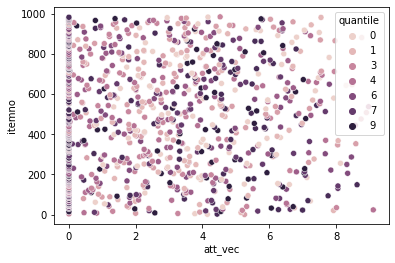

In [112]:
sns.scatterplot(data=df,x='att_vec',y='itemno',hue='quantile')

In [24]:
# beta = params['beta_enc']
# b = np.log(1/beta - 1)
# def cal_att_beta(x):
#     if x.att_vec <= 0:
#         tmp = 0.15
#     else:
#         tmp = 1 / (1 + np.exp(x.att_vec + b))
#     return tmp
# df['att_beta'] = df.apply(cal_att_beta, axis = 1)
# df.sort_values(by='freq')

In [25]:
# m = params['m']
# n = params['n']
# p = params['p']
# def cal_att_beta(x):
#     tmp = x.att_vec * params['gamma_fc']
#     return tmp
# df['att_beta'] = df.apply(cal_att_beta, axis = 1)
# df.sort_values(by='freq')

In [26]:
# sns.scatterplot(data=df,x='att_beta',y='itemno',hue='quantile')

In [27]:
# df.groupby("quantile").att_beta.mean()

In [28]:
recs = model.rec_items
rts = model.rec_times
csims = model.recog_similarity
result = np.column_stack((recs,rts,csims))
df_thin.loc[df_thin.session==sess, ['s_resp','s_rt','csim']] = result
df_simu = df_thin.merge(df_test,on=['session','itemno'])
df_simu

,session,itemno,s_resp,s_rt,csim,item,itemno_old,freq,quantile,old
0,0,341,0.0,1906.708496,0.000448,FORT,595,411,6,True
1,0,512,1.0,1936.438232,0.352322,MANSION,864,156,3,True
2,0,66,0.0,1939.265137,0.008360,BENCH,121,345,6,True
3,0,386,0.0,1904.880859,0.000000,GUARD,667,658,7,False
4,0,57,0.0,1955.659546,0.012294,BEE,112,185,4,True
...,...,...,...,...,...,...,...,...,...,...
195,0,960,1.0,2596.980713,0.215173,WHEAT,1602,527,7,True
196,0,518,0.0,2433.547607,0.114454,MATCH,878,775,7,True
197,0,623,0.0,2725.430420,0.167386,PENCIL,1042,276,5,True
198,0,556,0.0,2554.808594,0.137177,MULE,931,82,2,True


In [29]:
df_simu.groupby(["old","quantile"]).csim.mean()

old    quantile
False  0           0.000000
       1           0.000000
       2           0.000000
       3           0.000000
       4           0.000000
       5           0.000000
       6           0.000000
       7           0.000000
       8           0.000000
       9           0.000000
True   0           0.147694
       1           0.167092
       2           0.150602
       3           0.147846
       4           0.108323
       5           0.148250
       6           0.124385
       7           0.172641
       8           0.118398
       9           0.121424
Name: csim, dtype: float64

In [30]:
# df["s_mean"] = np.mean(s_mat,axis=1)
# df["log_freq"] = np.log(df["freq"])
# df

In [31]:
# # verified
# print('all nos \n',model.all_nos_unique)
# print('pres nos \n', model.pres_nos)
# print('pres index \n',model.pres_indexes)
# print(model.nitems_unique)
# print(model.nelements)
# print(model.distractor_idx)
# print('cue nos \n', model.cues_nos)
# print('cue index \n', model.cues_indexes)